<a href="https://colab.research.google.com/github/Pedro-Boechat/trainee/blob/main/periodo3randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Random Forest Binário

In [635]:
df = pd.read_csv('/content/winequality.csv')

In [636]:
df.tail()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
6492,6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0
6496,6496,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6,0


In [637]:
df.isna().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_is_red             0
dtype: int64

In [638]:
df = df.drop(columns='Unnamed: 0')

In [639]:
colunas = df.columns

## Normalizar

In [640]:
for i in df.columns.drop('quality'):
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [641]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,6,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,6,1.0
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,6,0.0
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,6,0.0
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,6,0.0


## Implementando Random Forest

In [642]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('wine_is_red')]
Y = df['wine_is_red']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [653]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(n_estimators = 1000) # Testei outros hyperparametros, mas essa foi a configuração com maior precisão
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [644]:
predictions = rf.predict(X_test)

In [645]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9969230769230769


Foram feitos testes de precisão com downsample da label majoritária, ou sem balanceamento.

99,69% Precisão sem resample

98,91% Precisão com resample a 1599

## Feature Importance

In [646]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=colunas.drop('wine_is_red'),
                                   columns=['importance']).sort_values('importance', ascending=False)

In [647]:
feature_importances

,importance
total sulfur dioxide,0.293614
chlorides,0.270403
volatile acidity,0.132042
density,0.059984
sulphates,0.054419
free sulfur dioxide,0.051874
residual sugar,0.047510
fixed acidity,0.041990
pH,0.020121
citric acid,0.015099


Nota-se que quality e alcohol influenciam em menos de 1% do resultado. Dito isso, vou remover essas features.

In [648]:
mais_imp = list(feature_importances.index[:9])

In [649]:
X_train = X_train[list(mais_imp)]
X_test = X_test[list(mais_imp)]

In [650]:
X_train

,total sulfur dioxide,chlorides,volatile acidity,density,sulphates,free sulfur dioxide,residual sugar,fixed acidity,pH
2059,0.211982,0.034884,0.106667,0.049547,0.117978,0.083333,0.010736,0.157025,0.503876
5106,0.122120,0.122924,0.386667,0.227299,0.275281,0.069444,0.039877,0.495868,0.503876
5075,0.324885,0.064784,0.240000,0.198381,0.134831,0.031250,0.121166,0.256198,0.465116
1090,0.317972,0.036545,0.086667,0.117409,0.089888,0.138889,0.102761,0.297521,0.333333
3937,0.465438,0.059801,0.113333,0.165992,0.134831,0.184028,0.111963,0.198347,0.348837
...,...,...,...,...,...,...,...,...,...
920,0.299539,0.073090,0.106667,0.217467,0.168539,0.187500,0.219325,0.239669,0.240310
3777,0.271889,0.009967,0.073333,0.109312,0.095506,0.159722,0.104294,0.330579,0.209302
245,0.200461,0.051495,0.166667,0.048005,0.146067,0.069444,0.055215,0.256198,0.356589
2748,0.453917,0.059801,0.133333,0.166185,0.134831,0.156250,0.105828,0.198347,0.418605


In [651]:
rf = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9961538461538462


Removendo as duas features menos importantes, perdeu-se 0,08% de precisão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


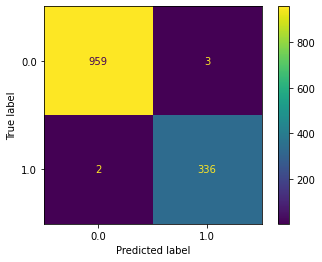

In [652]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=rf,X= X_test, y_true=y_test)

# Random Forest Multiclasse

In [622]:
df = pd.read_csv('/content/winequality.csv')

In [623]:
df = df.drop(columns='Unnamed: 0')

In [624]:
colunas = df.columns

## Normalizar

In [625]:
for i in df.columns.drop('quality'):
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [626]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,6,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,6,1.0
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,6,0.0
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,6,0.0
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,6,0.0


## Implementando Random Forest

In [627]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [628]:
# Separando as qualidades
df_6 = df[df['quality']==6]
df_4 = df[df['quality']==4]
df_5 = df[df['quality']==5]
df_7 = df[df['quality']==7]
df_8 = df[df['quality']==8]
df_3 = df[df['quality']==3]
df_9 = df[df['quality']==9]
# Resampling
df_6_corrigido = resample(df_6, 
                                 replace=False,    
                                 n_samples=216)
df_4_corrigido = resample(df_4, 
                                 replace=True,    
                                 n_samples=900)
df_5_corrigido = resample(df_5, 
                                 replace=False,    
                                 n_samples=216)
df_7_corrigido = resample(df_7, 
                                 replace=False,    
                                 n_samples=216)
df_8_corrigido = resample(df_8, 
                                 replace=True,    
                                 n_samples=900)
df_3_corrigido = resample(df_3, 
                                 replace=True,    
                                 n_samples=216)
df_9_corrigido = resample(df_9, 
                                 replace=True,    
                                 n_samples=216)
# Combinando as qualidades resampled
#df = pd.concat([df_6,df_8_corrigido,df_4_corrigido,df_5,df_7])

In [629]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('quality')]
Y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [630]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(n_estimators = 1000, n_jobs=-1) # Testei outros hyperparametros, mas essa foi a configuração com maior sucesso que tive
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [631]:
predictions = rf.predict(X_test)
predictionstrain = rf.predict(X_train)

In [632]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6961538461538461


70% Precisão com dados sem manipulação

70% Precisão removendo 3, 9. Sem resample

63% Precisão removendo 3, 9. Resample a 216

70% Precisão com resample de todos a 216

78% Precisão removendo 3, 9. Oversample das categorias 4, 8 para 900 amostras





## Feature importance

In [633]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=colunas.drop('quality'),
                                   columns=['importance']).sort_values('importance', ascending=False)

In [634]:
feature_importances

,importance
alcohol,0.123266
density,0.102215
volatile acidity,0.099549
total sulfur dioxide,0.091164
chlorides,0.087140
free sulfur dioxide,0.086498
sulphates,0.085982
residual sugar,0.084862
pH,0.082684
citric acid,0.078155


A única feature descartável nesse caso seria "Wine is red"

Abaixo está a matriz confusão dos dados sem manipulação. Nenhum acerto nas categorias 3 e 9, devido a sua baixa ocorrência

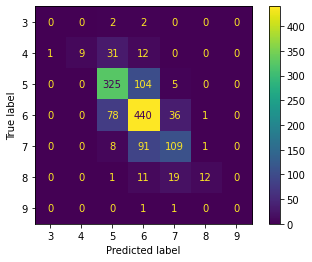

Abaixo a matriz confusão dos dados com oversample a 216. Nota-se que não houve nenhum erro na classificação de 3 e 9. Isso pode indicar overfit

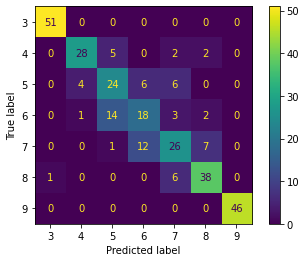

Abaixo a matriz confusão com as categorias 3 e 9 removidas, mas sem nenhum resample.

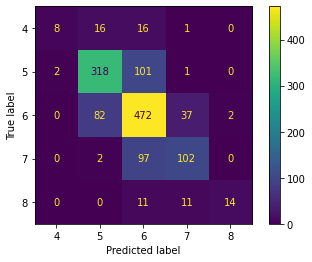

Abaixo a matriz confusão com as categorias 3 e 9 removidas, e oversample das categorias 4 e 8 para 900 amostras.

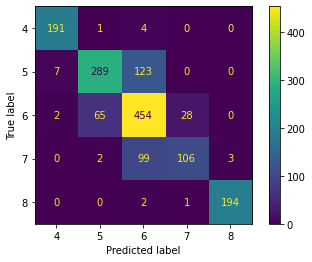

# Conclusão

Para o caso binário, o random forest obteve precisão de 99,7%; valor um pouco acima do obtido pelo KNN (99,0%)

Para o caso multiclasse, o modelo com Random Forest obteve maior precisão do que o modelo KNN em todos os casos testados.